Notebook para exploração dos dados, treinamento e teste do modelo

# Carregando os dados

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas
from shapely.geometry import Point
import numpy as np
from scipy import stats


In [5]:
# Carregar o conjunto de dados
dados = pd.read_csv("dataset/brasil_estado_cidade.csv", encoding="latin1")

# Exibir as primeiras linhas do dataset
print(dados.head())

   id property_type       state     region       lat        lon  area_m2  \
0   1     apartment  Pernambuco  Northeast -8.134204 -34.906326     72.0   
1   2     apartment  Pernambuco  Northeast -8.126664 -34.903924    136.0   
2   3     apartment  Pernambuco  Northeast -8.125550 -34.907601     75.0   
3   4     apartment  Pernambuco  Northeast -8.120249 -34.895920    187.0   
4   5     apartment  Pernambuco  Northeast -8.142666 -34.906906     80.0   

   price_brl    city  
0  414222.98  Recife  
1  848408.53  Recife  
2  299438.28  Recife  
3  848408.53  Recife  
4  464129.36  Recife  


# Tratamento dos Dados

In [6]:
# Eliminando registros com valores null
dados.dropna(inplace=True)

# Calculando o valor do metro quadrado do imóvel
dados['price_m2'] = dados['price_brl'] / dados['area_m2']

# Exibir as primeiras linhas para verificar
print(dados.head())

   id property_type       state     region       lat        lon  area_m2  \
0   1     apartment  Pernambuco  Northeast -8.134204 -34.906326     72.0   
1   2     apartment  Pernambuco  Northeast -8.126664 -34.903924    136.0   
2   3     apartment  Pernambuco  Northeast -8.125550 -34.907601     75.0   
3   4     apartment  Pernambuco  Northeast -8.120249 -34.895920    187.0   
4   5     apartment  Pernambuco  Northeast -8.142666 -34.906906     80.0   

   price_brl    city     price_m2  
0  414222.98  Recife  5753.096944  
1  848408.53  Recife  6238.298015  
2  299438.28  Recife  3992.510400  
3  848408.53  Recife  4536.944011  
4  464129.36  Recife  5801.617000  


In [26]:
def remover_outliers_por_cidade(df):
    """Remove outliers da coluna 'price_brl' agrupando por cidade."""

    def remover_outliers_grupo(grupo):
        """Remove outliers de um grupo usando o método Z-score."""
        z_scores = np.abs(stats.zscore(grupo["price_brl"]))
        return grupo[(z_scores < 3)]

    df_filtrado = df.groupby("city").apply(remover_outliers_grupo).reset_index(drop=True)
    return df_filtrado


#dados_sem_outliers = remover_outliers_por_cidade(dados)
dados = remover_outliers_por_cidade(dados)

#print(dados_sem_outliers)

/tmp/ipykernel_1759/3618994212.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_filtrado = df.groupby("city").apply(remover_outliers_grupo).reset_index(drop=True)


# Explorando

In [27]:
# Informações gerais
print("Informações gerais do dataset:")
print(dados.info())

# Estatísticas descritivas
print("\nEstatísticas descritivas:")
print(dados.describe())

# Valores ausentes
print("\nValores ausentes:")
print(dados.isnull().sum())


Informações gerais do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11009 entries, 0 to 11008
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             11009 non-null  int64  
 1   property_type  11009 non-null  object 
 2   state          11009 non-null  object 
 3   region         11009 non-null  object 
 4   lat            11009 non-null  float64
 5   lon            11009 non-null  float64
 6   area_m2        11009 non-null  float64
 7   price_brl      11009 non-null  float64
 8   city           11009 non-null  object 
 9   price_m2       11009 non-null  float64
dtypes: float64(5), int64(1), object(4)
memory usage: 860.2+ KB
None

Estatísticas descritivas:
                 id           lat           lon       area_m2     price_brl  \
count  11009.000000  11009.000000  11009.000000  11009.000000  1.100900e+04   
mean    6456.569080    -24.699868    -46.736546    111.878281  6.531951e+05   


Análise de colunas categóricas:

Coluna: property_type
property_type
apartment    8654
house        2355
Name: count, dtype: int64


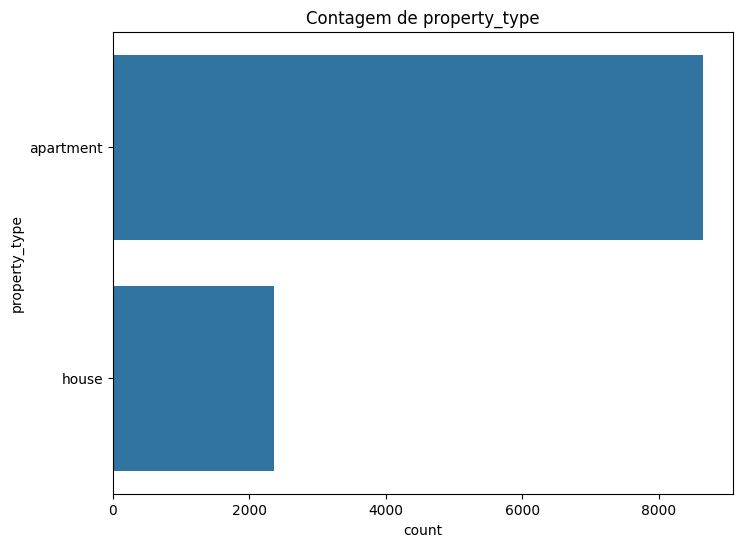


Coluna: state
state
Rio de Janeiro         2623
SÂo Paulo             2607
Santa Catarina         2571
Rio Grande do Sul      2519
Pernambuco              314
Rio Grande do Norte     279
Sergipe                  67
PiauÂ                   24
RondÂnia                 5
Name: count, dtype: int64


/usr/local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 139 (\x8b) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 146 (\x92) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 153 (\x99) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


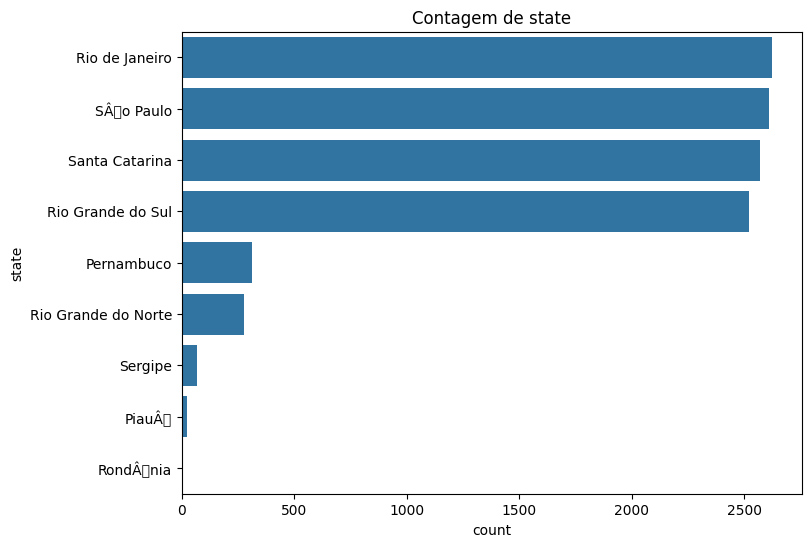


Coluna: region
region
Southeast    5230
South        5090
Northeast     684
North           5
Name: count, dtype: int64


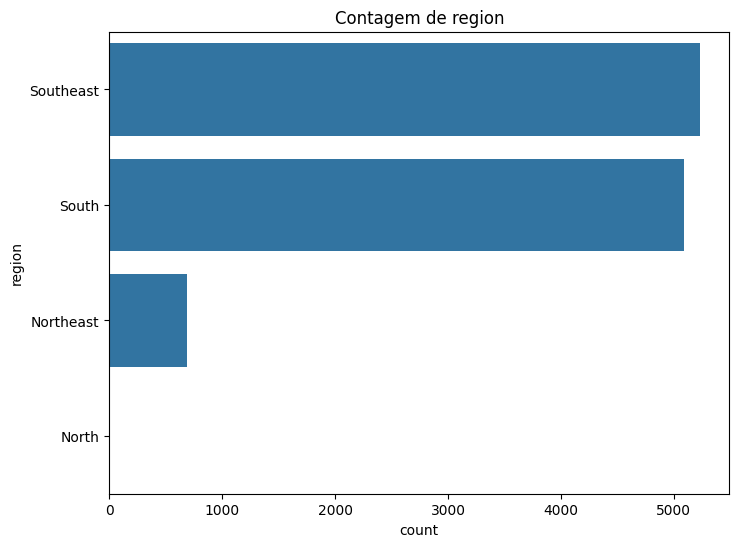


Coluna: city
city
Rio de Janeiro            2008
Porto Alegre              1933
SÃ£o Paulo                1606
BalneÃ¡rio CamboriÃº      1186
FlorianÃ³polis             443
                          ... 
TaboÃ£o da Serra             2
Vera Cruz                    2
Vargem Grande Paulista       2
TremembÃ©                    2
Vinhedo                      2
Name: count, Length: 123, dtype: int64


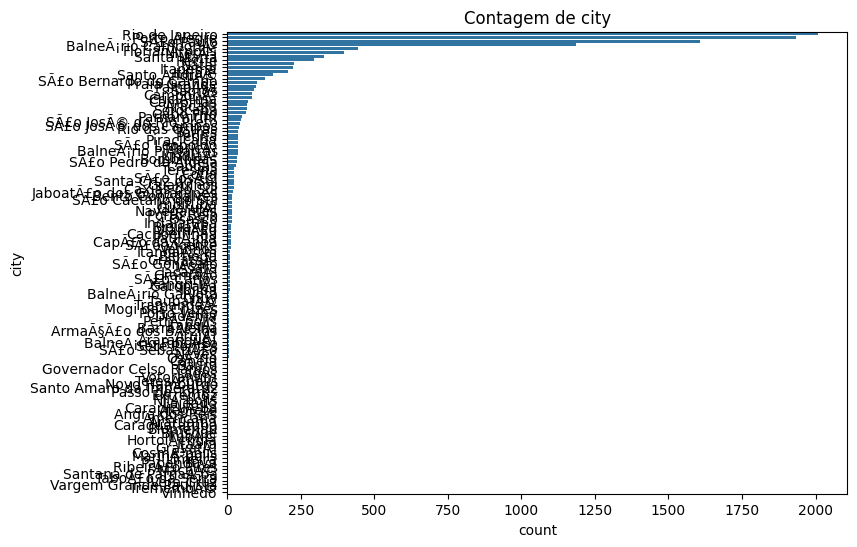

In [28]:
# Análise de colunas categóricas
colunas_categoricas = ['property_type', 'state', 'region', 'city']


print("\nAnálise de colunas categóricas:")
for coluna in colunas_categoricas:
    print(f"\nColuna: {coluna}")
    print(dados[coluna].value_counts())

    # Gráfico de barras para visualização
    plt.figure(figsize=(8, 6))
    sns.countplot(y=dados[coluna], order=dados[coluna].value_counts().index)
    plt.title(f"Contagem de {coluna}")
    plt.show()


Análise de colunas numéricas:

Coluna: area_m2


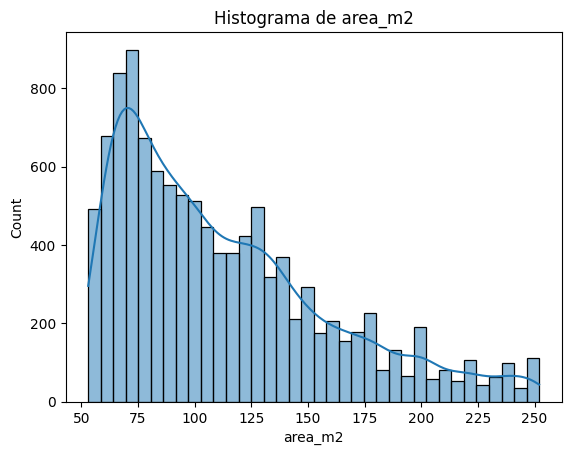

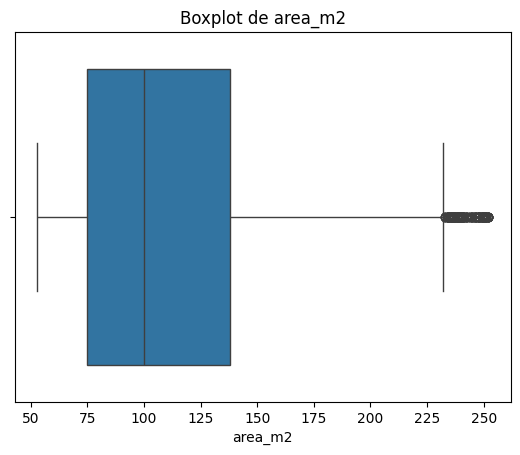


Coluna: price_brl


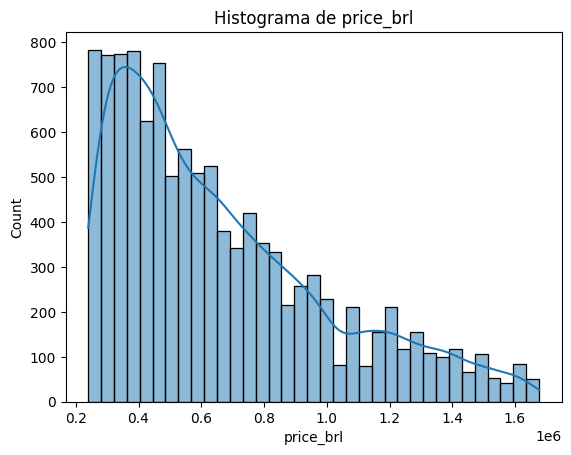

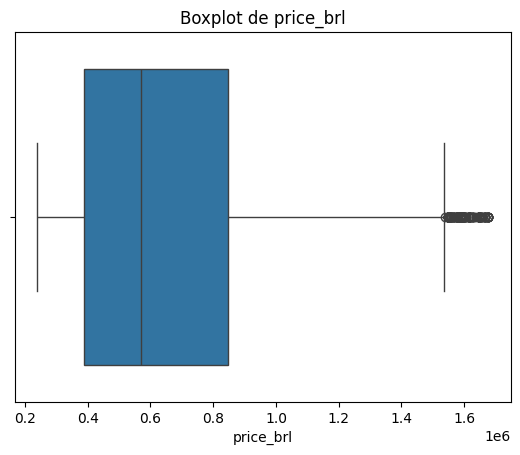


Coluna: price_m2


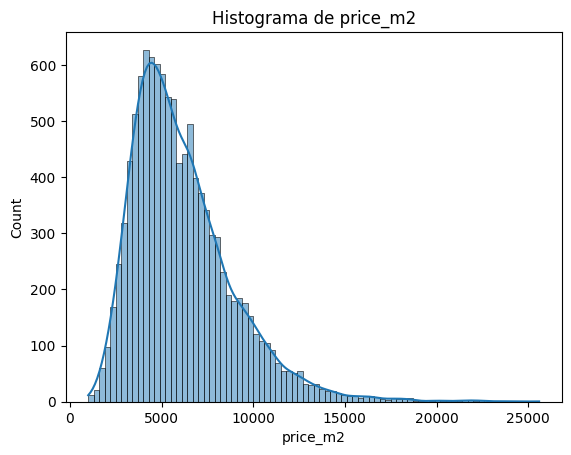

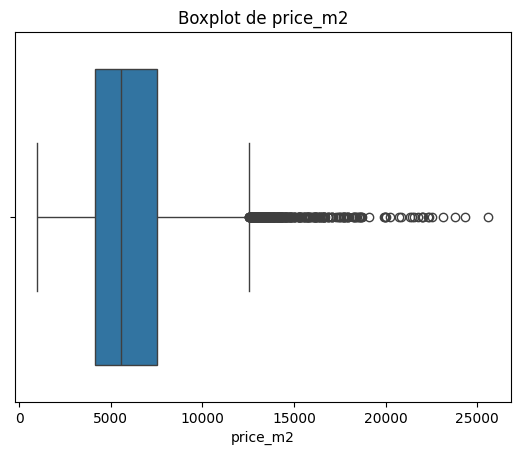

In [10]:

# Análise de colunas numéricas
colunas_numericas = ['area_m2', 'price_brl', 'price_m2']

print("\nAnálise de colunas numéricas:")

for coluna in colunas_numericas:
    print(f"\nColuna: {coluna}")

    # Histograma
    plt.figure()
    sns.histplot(dados[coluna], kde=True)
    plt.title(f"Histograma de {coluna}")
    plt.show()

    # Boxplot
    plt.figure()
    sns.boxplot(x=dados[coluna])
    plt.title(f"Boxplot de {coluna}")
    plt.show()
    

# Cruzando dados

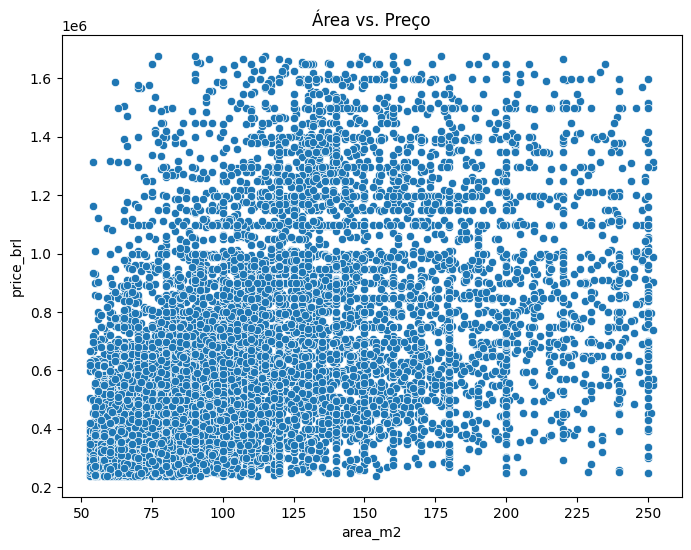

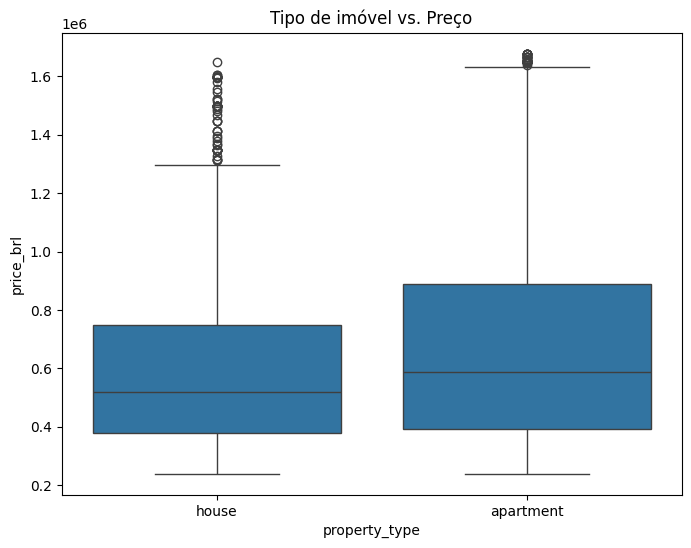

In [11]:
# Relação entre area_m2 e price_brl
plt.figure(figsize=(8, 6))
sns.scatterplot(x='area_m2', y='price_brl', data=dados)
plt.title("Área vs. Preço")
plt.show()

# Relação entre property_type e price_brl
plt.figure(figsize=(8, 6))
sns.boxplot(x='property_type', y='price_brl', data=dados)
plt.title("Tipo de imóvel vs. Preço")
plt.show()

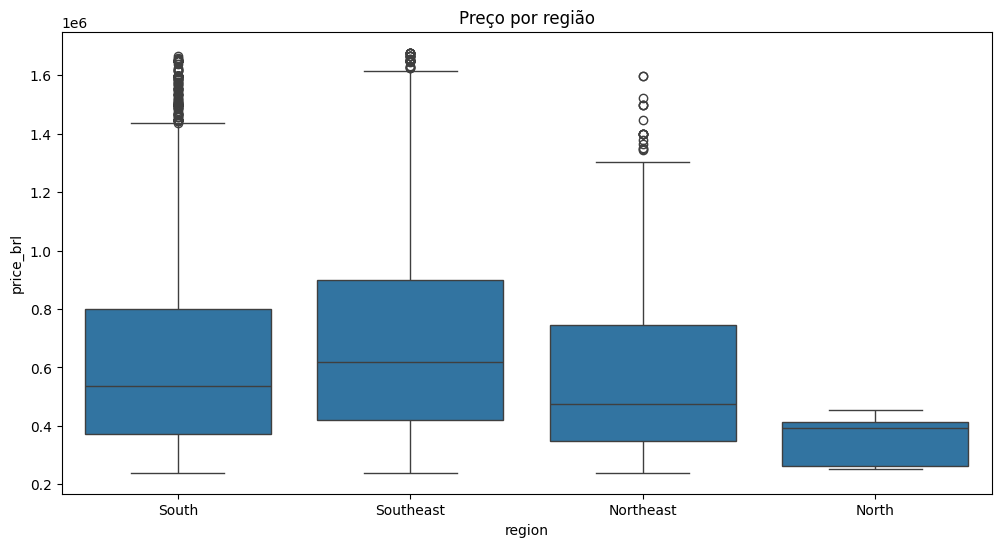

/usr/local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 139 (\x8b) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 153 (\x99) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 146 (\x92) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


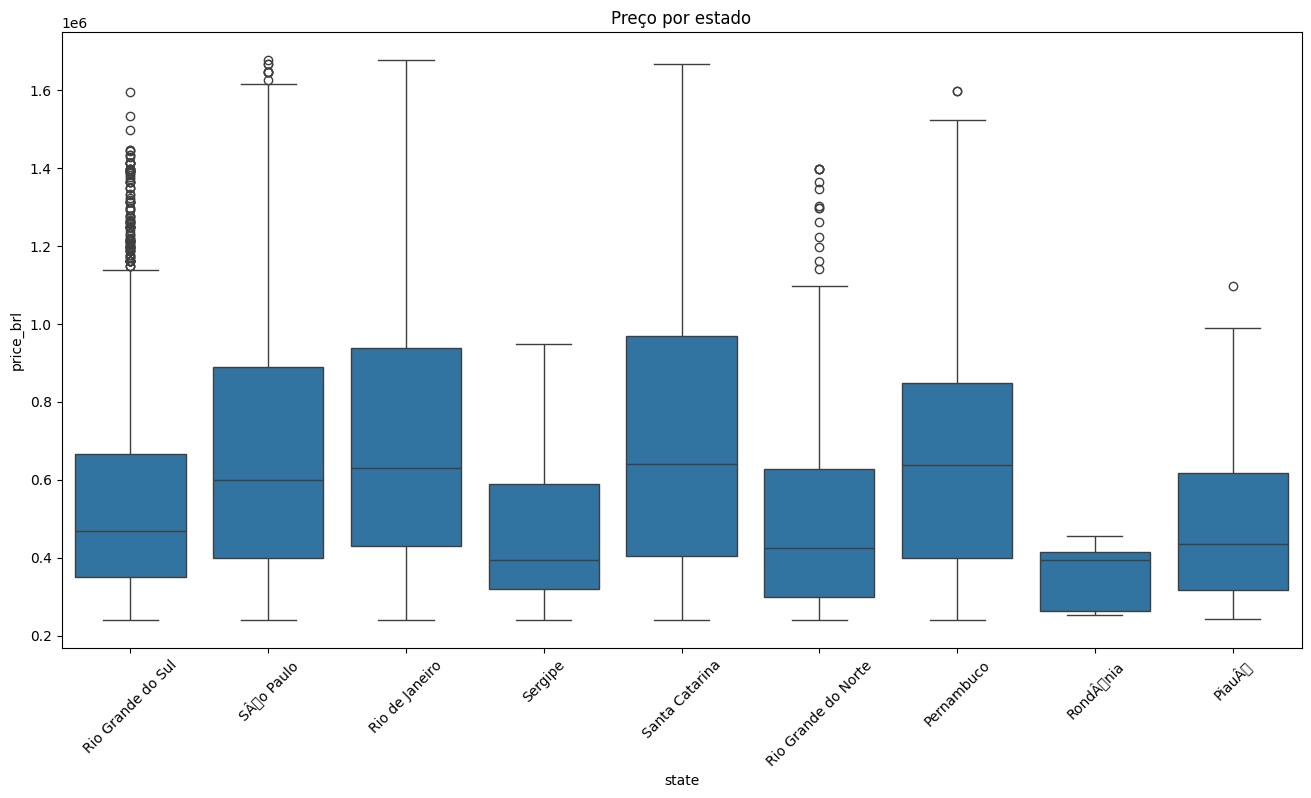

/usr/local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 139 (\x8b) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 153 (\x99) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 146 (\x92) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


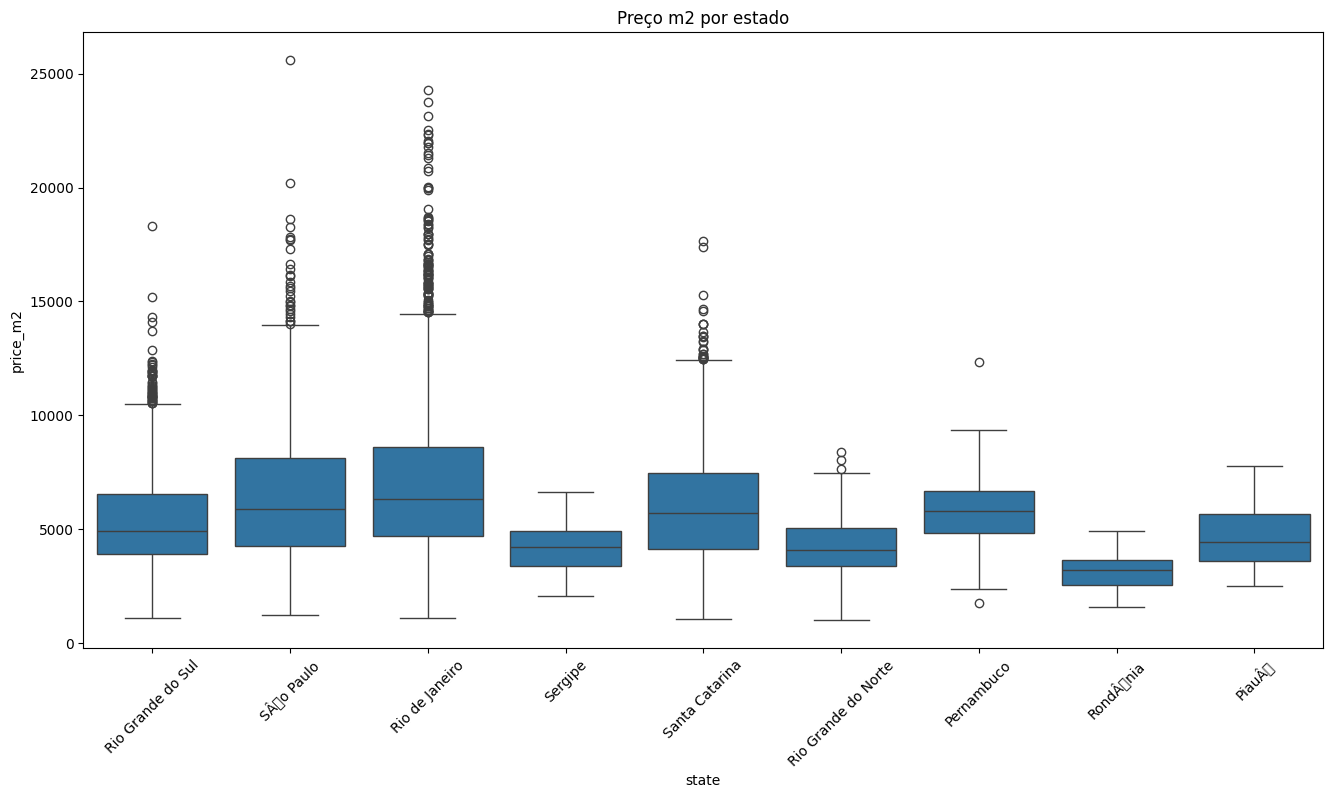

In [12]:
# Preço por região
plt.figure(figsize=(12, 6))
sns.boxplot(x='region', y='price_brl', data=dados)
plt.title("Preço por região")
plt.show()

# Preço por estado
plt.figure(figsize=(16, 8))
sns.boxplot(x='state', y='price_brl', data=dados)
plt.title("Preço por estado")
plt.xticks(rotation=45)
plt.show()

# Metro 2 por região
plt.figure(figsize=(16, 8))
sns.boxplot(x='state', y='price_m2', data=dados)
plt.title("Preço m2 por estado")
plt.xticks(rotation=45)
plt.show()



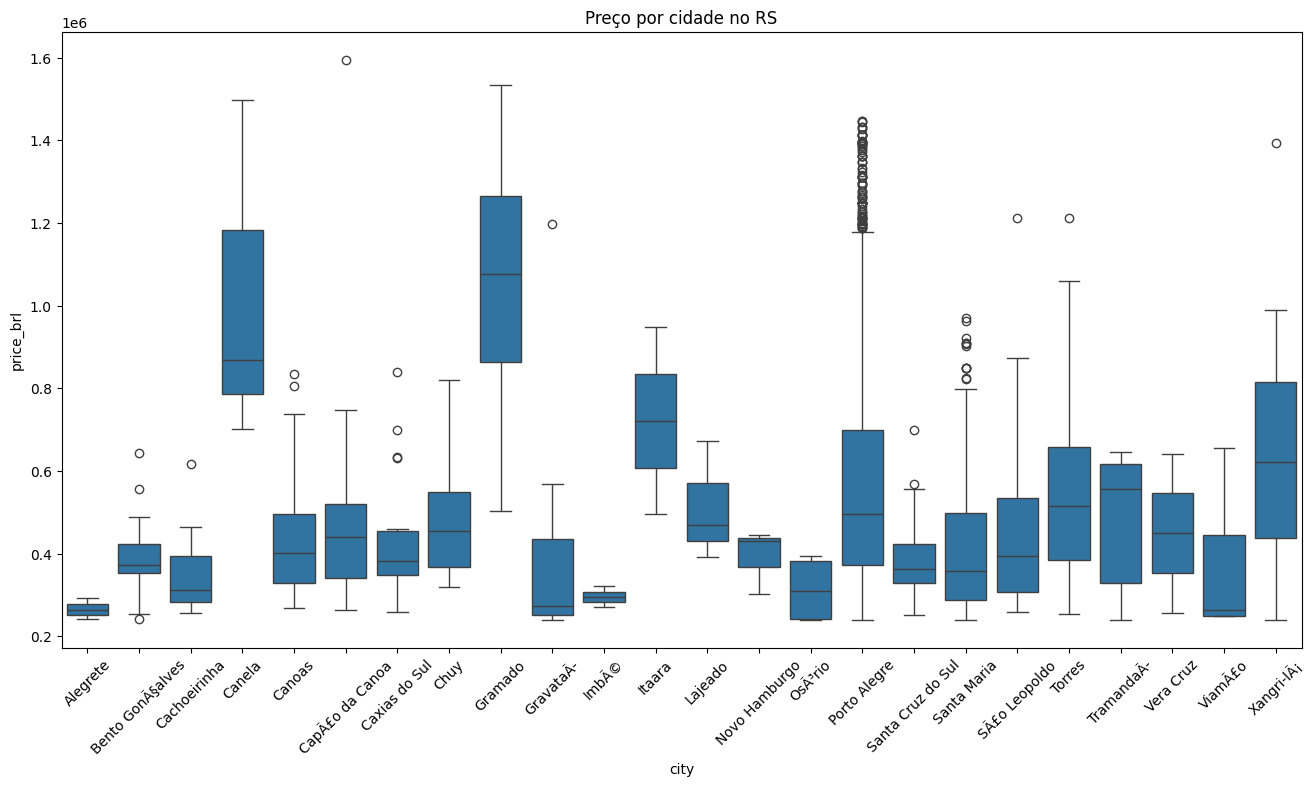

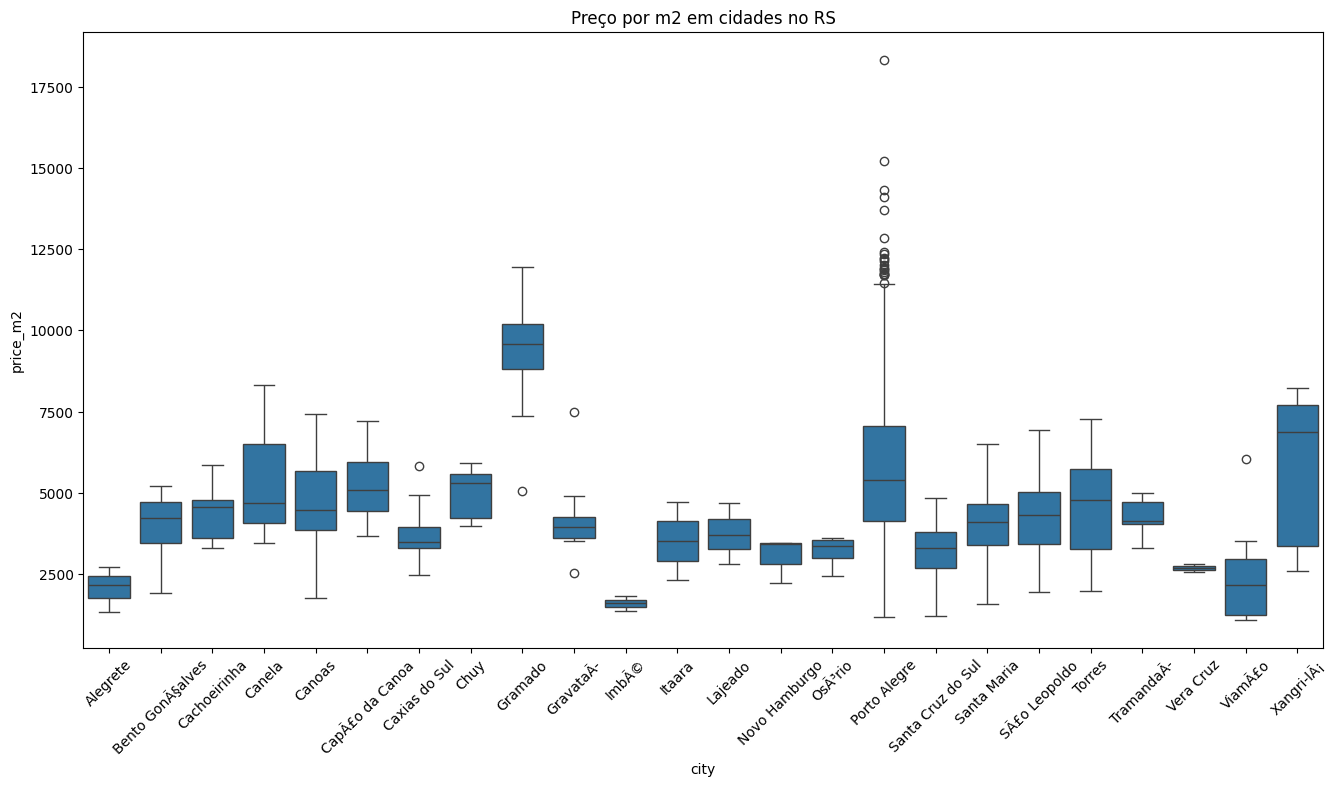

In [13]:
dados_rs = dados[dados['state'] == "Rio Grande do Sul"]

# Preço no RS
plt.figure(figsize=(16, 8))
sns.boxplot(x='city', y='price_brl', data=dados_rs)
plt.title("Preço por cidade no RS")
plt.xticks(rotation=45)
plt.show()

# Metro 2 no RS
plt.figure(figsize=(16, 8))
sns.boxplot(x='city', y='price_m2', data=dados_rs)
plt.title("Preço por m2 em cidades no RS")
plt.xticks(rotation=45)
plt.show()

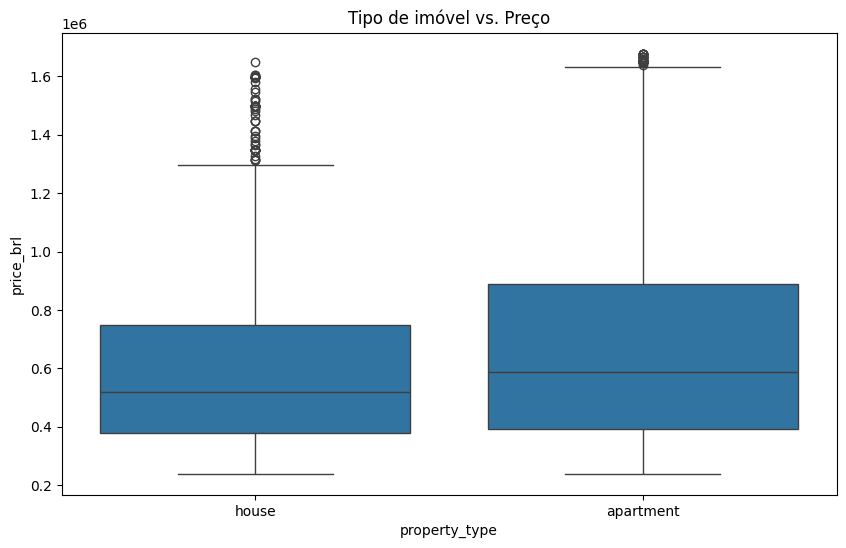

In [14]:
# Tipo de imóvel vs. preço
plt.figure(figsize=(10, 6))
sns.boxplot(x='property_type', y='price_brl', data=dados)
plt.title("Tipo de imóvel vs. Preço")
plt.show()

# Distribuição Geográfica

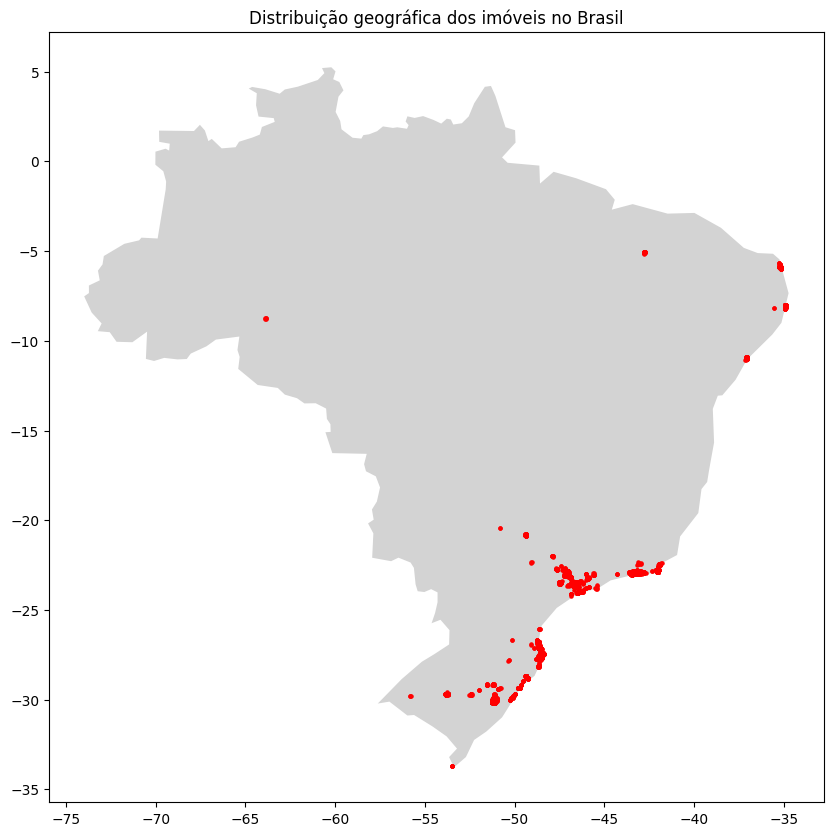

In [15]:

# Criando um GeoDataFrame a partir das coordenadas
geometry = [Point(xy) for xy in zip(dados['lon'], dados['lat'])]
geo_dados = geopandas.GeoDataFrame(dados, geometry=geometry)


# Carregando o mapa do Brasil
brasil = geopandas.read_file("dataset/mapas/ne_110m_admin_0_countries.shp")
brasil = brasil[brasil.ADMIN == 'Brazil']


# Plotando o mapa e os pontos dos imóveis
fig, ax = plt.subplots(figsize=(10, 10))
brasil.plot(ax=ax, color='lightgray')
geo_dados.plot(ax=ax, markersize=5, color='red')
plt.title("Distribuição geográfica dos imóveis no Brasil")
plt.show()

# Treinamento

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor


from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split


In [17]:
# Exemplo de pré-processamento
X = dados.drop(["price_brl", "price_m2"], axis=1)  # Features
y = dados["price_brl"]  # Variável alvo


# Identificando colunas numéricas e categóricas
numeric_features = X.select_dtypes(include=['number']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Criando transformadores
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Criando o ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Treinamento de modelos

- **Regressão Linear**: Simples e interpretável, ideal para estabelecer uma linha de base.
- **Árvores de Decisão**: Capturam relações não-lineares entre as variáveis.
- **Random Forest**: Combinação de múltiplas árvores para melhorar a robustez e reduzir overfitting.
- **Gradient Boosting (ex.: XGBoost, LightGBM)**



In [18]:
# Regressão Linear

model_lr = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', LinearRegression())])

model_lr.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['id', 'lat', 'lon', 'area_m2'], dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['property_type', 'state', 'region', 'city'], dtype='object'))])),
                ('regressor', LinearRegression())])

In [19]:
#Random Forest

model_rf = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', RandomForestRegressor())])
model_rf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['id', 'lat', 'lon', 'area_m2'], dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['property_type', 'state', 'region', 'city'], dtype='object'))])),
                ('regressor', RandomForestRegressor())])

In [20]:
#Gradient Boost

model_gb = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', GradientBoostingRegressor())])
model_gb.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['id', 'lat', 'lon', 'area_m2'], dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['property_type', 'state', 'region', 'city'], dtype='object'))])),
                ('regressor', GradientBoostingRegressor())])

In [21]:
#Arvore de Decisões

model_dt = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', DecisionTreeRegressor())])
model_dt.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['id', 'lat', 'lon', 'area_m2'], dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['property_type', 'state', 'region', 'city'], dtype='object'))])),
                ('regressor', DecisionTreeRegressor())])

In [22]:
model_xgb = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', XGBRegressor())])
model_xgb.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['id', 'lat', 'lon', 'area_m2'], dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['property_type', 'state', 'region', 'city'], dtype='object'))])),
                ('regressor',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, col...
                              feature_types=None, feature_weights=None,
                              gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, ...))])

teste dos modelos

In [29]:
# Avaliação do modelo de regressão linear
y_pred_lr = model_lr.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)

# Avaliação do modelo Random Forest
y_pred_rf = model_rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

# Avaliação do modelo Gradient Boosting
y_pred_gb = model_gb.predict(X_test)
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)
mae_gb = mean_absolute_error(y_test, y_pred_gb)

# Avaliação do modelo Arvore de Decisão
y_pred_dt = model_dt.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)

# Avaliação do modelo Xgboost
y_pred_xgb = model_xgb.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)

print(f"Regressão Linear: MSE={mse_lr:.2f}, R2={r2_lr:.2f}, MAE={mae_lr:.2f}")
print(f"Random Forest: MSE={mse_rf:.2f}, R2={r2_rf:.2f}, MAE={mae_rf:.2f}")
print(f"Gradient Boosting: MSE={mse_gb:.2f}, R2={r2_gb:.2f}, MAE={mae_gb:.2f}")
print(f"Arvore de Decisão: MSE={mse_dt:.2f}, R2={r2_dt:.2f}, MAE={mae_dt:.2f}")
print(f"XGBoost: MSE={mse_xgb:.2f}, R2={r2_xgb:.2f}, MAE={mae_xgb:.2f}")

Regressão Linear: MSE=53086354959.46, R2=0.55, MAE=173764.07
Random Forest: MSE=34021864534.62, R2=0.71, MAE=129533.86
Gradient Boosting: MSE=36522643812.73, R2=0.69, MAE=141679.67
Arvore de Decisão: MSE=59278541864.14, R2=0.49, MAE=167819.71
XGBoost: MSE=33523428841.29, R2=0.71, MAE=130945.13
